# Tennis Task for Collaboration and Competition
---

### 1. Import the Necessary Packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from maddpg_agent import Agent

### 2. Instantiate the Environment and Agent

In [2]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
START_DECAY = 10000
GOAL_SCORE = .5


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 3. Train the Agent with DDPG

actions [array([-0.03971931, -0.03862256], dtype=float32), array([-0.15193883,  0.17079239], dtype=float32)]
actions [array([0.09873255, 0.05343626], dtype=float32), array([ 0.00412363, -0.02116291], dtype=float32)]
actions [array([ 0.18149726, -0.1152861 ], dtype=float32), array([ 0.6188392 , -0.21798177], dtype=float32)]
actions [array([ 0.6431709 , -0.39055595], dtype=float32), array([ 0.33962375, -0.00660642], dtype=float32)]
actions [array([ 0.3042109 , -0.20130013], dtype=float32), array([ 0.01575655, -0.05739324], dtype=float32)]
actions [array([-0.03203684, -0.08182707], dtype=float32), array([-0.22327964, -0.04250663], dtype=float32)]
actions [array([-0.21209076,  0.03000677], dtype=float32), array([-0.19902481, -0.03982441], dtype=float32)]
actions [array([-0.06848753,  0.13276124], dtype=float32), array([-0.35644928, -0.09623328], dtype=float32)]
actions [array([-0.6690192 , -0.16502544], dtype=float32), array([-0.5164313 , -0.13270885], dtype=float32)]
actions [array([-0.26

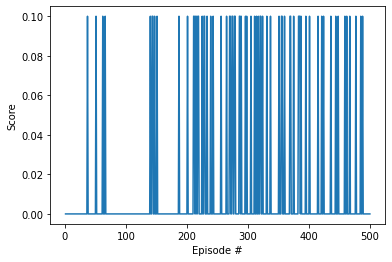

In [3]:
agent = Agent(state_size=24, action_size=2, random_seed=0)

def main(n_episodes=500, max_t=300, print_every=100):
    SOLVED = False
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]

        states = env_info.vector_observations
        agent.reset()
        score = 0

        while True:
            actions = [agent.act(state) for state in states]
            print(f"actions {actions}")
            actions = np.vstack(actions)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += np.amax(rewards)
            # assumption, episode will terminate for both agents at the same time
            if True in dones:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if np.mean(scores_deque) >= GOAL_SCORE and not SOLVED:
            SOLVED = True
            print(f'Environment solved! achieved an average score of 30 over 100 episodes at episode {i_episode}')
            torch.save(agent.actor_local.state_dict(), 'checkpointactor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpointcritic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = main()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
env.close()

### 4. Watch a Smart Agent!

In [5]:
def run_agent(n_episodes=1, max_t=300, print_every=100):
    score = 0
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations
        agent.reset()

        while True:
            action = agent.act(state, add_noise=False, decay_noise=decay)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            state = next_state
            score += reward
            if done:
                break 
    return score

score = run_agent()

print(f"Agent Complete Episode With a Score Of: {score}")

FileNotFoundError: [Errno 2] No such file or directory: 'checkpoint_actor.pth'